# Продвинутый SQL, вторая часть проекта

## Описание задания
В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из [урока про представление результатов](https://practicum.yandex.ru/learn/data-analyst-plus/courses/96ccbf7a-b65d-4f51-b5f3-18360ad1e301/sprints/6116/topics/27f7c9a7-a474-4a82-8392-b3f069b26f69/lessons/e12d84bb-ffa8-490c-8bde-0935d86ceccb/). Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT 
    DATE(DATE_TRUNC('month', creation_date)) AS month_date, 
    SUM(views_count) AS total_views
FROM stackoverflow.posts
WHERE creation_date >= '2008-01-01'
AND creation_date <= '2008-12-31'
GROUP BY DATE(DATE_TRUNC('month', creation_date))
ORDER BY SUM(views_count) DESC
'''

# выполните запрос
total_views_df = pd.read_sql_query(query, con=engine) 
total_views_df.head(20)

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


### Ответ: 
Данные в таблице 'posts' начинаются с конца июля 2008 года, поэтому в итоговой таблице данные за 6 месяцев с июля по декабрь, причем цифра за июль сильно меньше.

Данные за разные месяцы отличаются, с июля по декабрь наблюдается стабильный рост количества постов. Вероятно, это связано с развитием сервиса и ростом количества пользователей, как следствие - рост количества постов.

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [7]:
# напишите запрос
query = '''
SELECT users.display_name,
    COUNT(DISTINCT users.id) AS users_count,
    COUNT(posts.id) AS posts_count
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
JOIN stackoverflow.post_types ON posts.post_type_id = post_types.id
WHERE post_types.type = 'Answer'
AND posts.creation_date <= (users.creation_date + interval '1 month')
GROUP BY users.display_name
HAVING COUNT(posts.id) > 100
ORDER BY users.display_name, COUNT(posts.id) DESC
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,display_name,users_count,posts_count
0,1800 INFORMATION,1,101
1,Adam Bellaire,1,104
2,Adam Davis,1,126
3,Adam Liss,1,114
4,Alan,8,108
...,...,...,...
71,leppie,1,110
72,lomaxx,1,108
73,mattlant,1,159
74,paxdiablo,1,117


### Ответ:
В базе нет требования уникальности к отображаемому имени пользователя, колонка 'display_name'. Фактически некоторым строкам в таблице соответствуют разные пользователи.

Чтоб посчитать пользователей, задавших более ста уникальных вопросов в течение месяца после регистрации, нужно делать группировку по 'users.id', а не по 'users.display_name', или убрать строки, где 'COUNT(DISTINCT users.id) > 1'. Например, так:

In [8]:
# напишите запрос
query = '''
SELECT -- users.id,
    MIN(users.display_name), 
    -- COUNT(DISTINCT users.display_name),
    COUNT(DISTINCT users.id) AS users_count,
    COUNT(DISTINCT posts.id) AS posts_count
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
JOIN stackoverflow.post_types ON posts.post_type_id = post_types.id
WHERE post_types.type = 'Answer'
AND posts.creation_date <= (users.creation_date + interval '1 month')
GROUP BY users.id
HAVING COUNT(posts.id) >= 100
ORDER BY MIN(users.display_name), COUNT(posts.id) DESC
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,min,users_count,posts_count
0,1800 INFORMATION,1,101
1,Adam Bellaire,1,104
2,Adam Davis,1,126
3,Adam Liss,1,114
4,Amy B,1,133
...,...,...,...
60,leppie,1,110
61,lomaxx,1,108
62,mattlant,1,159
63,paxdiablo,1,117


В этом случае одному users.id соответствует одно display_name, поэтому можно использовать любую аггрегатную функцию, например: `MIN(users.display_name)`.

Как видно из запроса ниже, в базе нет и не может быть пользователей с двумя `display_name` на один `id`. Это означало бы дублирование первичного ключа.

In [9]:
# напишите запрос
query = '''
SELECT users.id,
    COUNT(DISTINCT users.display_name) -- одному users.id соответствует одно display_name
FROM stackoverflow.users
GROUP BY users.id
HAVING COUNT(DISTINCT users.display_name) > 1
ORDER BY MIN(users.display_name)
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df.head(20)

,id,count


# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [10]:
# напишите запрос
query = '''
WITH these_users AS 
(SELECT DISTINCT users.id 
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE users.creation_date >= '2008-09-01'
AND users.creation_date <= '2008-10-01'
AND posts.creation_date >= '2008-12-01'
AND posts.creation_date <= '2009-01-01'
)

SELECT DATE(DATE_TRUNC('month', posts.creation_date)),
    COUNT(posts.id)
FROM stackoverflow.posts
WHERE posts.user_id IN (SELECT * FROM these_users)
AND posts.creation_date >= '2008-01-01'
AND posts.creation_date <= '2008-12-31'
GROUP BY DATE(DATE_TRUNC('month', posts.creation_date))
ORDER BY DATE(DATE_TRUNC('month', posts.creation_date)) DESC
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,date,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


In [11]:
# напишите запрос
query = '''
WITH these_users AS 
(SELECT DISTINCT users.id,
    DATE(users.creation_date) AS creation_date
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE users.creation_date >= '2008-09-01'
AND users.creation_date <= '2008-09-30'
AND posts.creation_date >= '2008-12-01'
AND posts.creation_date <= '2008-12-31'
)

SELECT DISTINCT creation_date
FROM these_users
ORDER BY creation_date DESC
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,creation_date
0,2008-09-29
1,2008-09-28
2,2008-09-27
3,2008-09-26
4,2008-09-25
5,2008-09-24
6,2008-09-23
7,2008-09-22
8,2008-09-21
9,2008-09-20


### Ответ:
Аномалия в данных состоит в том, что пользователи зарегались в сентябре, а их первые посты встречаются в августе. 

Все эти посты принадлежат двум пользователям. Пользователю с `id = 31505`, возможно, неудачно обновили дату регистрации; он был активен весь август. С `id = 4381` тоже что-то случилось.

In [12]:
# напишите запрос
query = '''
WITH these_users AS 
(SELECT DISTINCT users.id 
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE users.creation_date >= '2008-09-01'
AND users.creation_date <= '2008-10-01'
AND posts.creation_date >= '2008-12-01'
AND posts.creation_date <= '2009-01-01'
)

SELECT 
    users.id,
    posts.creation_date AS post_creation_date,
    users.creation_date AS user_creation_date
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE posts.user_id IN (SELECT * FROM these_users)
AND posts.creation_date < '2008-09-01'
ORDER BY posts.creation_date
'''

# выполните запрос
active_users_df = pd.read_sql_query(query, con=engine)
active_users_df

,id,post_creation_date,user_creation_date
0,31505,2008-08-12 13:15:47,2008-09-01 00:00:00
1,31505,2008-08-12 14:16:42,2008-09-01 00:00:00
2,31505,2008-08-12 14:39:20,2008-09-01 00:00:00
3,31505,2008-08-12 16:32:25,2008-09-01 00:00:00
4,31505,2008-08-12 17:00:35,2008-09-01 00:00:00
5,31505,2008-08-13 14:03:39,2008-09-01 00:00:00
6,31505,2008-08-13 21:10:42,2008-09-01 00:00:00
7,31505,2008-08-14 10:28:43,2008-09-01 00:00:00
8,31505,2008-08-14 10:36:04,2008-09-01 00:00:00
9,31505,2008-08-14 11:07:01,2008-09-01 00:00:00


При желании можно скорректировать запрос, исключив этих пользователей. 

In [13]:
# напишите запрос
query = '''
WITH these_users AS 
(SELECT DISTINCT users.id 
FROM stackoverflow.posts
JOIN stackoverflow.users ON posts.user_id = users.id
WHERE users.creation_date >= '2008-09-01'
AND users.creation_date < '2008-10-01'
AND users.id NOT IN (31505, 4381)
AND posts.creation_date >= '2008-12-01'
AND posts.creation_date <= '2009-01-01'
)

SELECT DATE(DATE_TRUNC('month', posts.creation_date)),
    COUNT(posts.id)
FROM stackoverflow.posts
WHERE posts.user_id IN (SELECT * FROM these_users)
AND posts.creation_date >= '2008-01-01'
AND posts.creation_date < '2009-01-01'
GROUP BY DATE(DATE_TRUNC('month', posts.creation_date))
ORDER BY DATE(DATE_TRUNC('month', posts.creation_date)) DESC
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,date,count
0,2008-12-01,17633
1,2008-11-01,18278
2,2008-10-01,27160
3,2008-09-01,24840


# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [14]:
# напишите запрос
query = '''
SELECT user_id,
    creation_date,
    views_count,
    SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date) AS cumulative_sum
FROM stackoverflow.posts
ORDER BY user_id
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,user_id,creation_date,views_count,cumulative_sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [15]:
# напишите запрос
query = '''
WITH these_users AS
(SELECT posts.user_id
FROM stackoverflow.posts
WHERE posts.creation_date >= '2008-08-01'
AND posts.creation_date <= '2008-08-31'
GROUP BY posts.user_id
HAVING COUNT(posts.id) > 120
),

users_days_posts AS
(SELECT posts.user_id AS user_id,
    DATE(posts.creation_date) AS post_date,
    COUNT(posts.id) AS posts_count
FROM stackoverflow.posts
WHERE posts.user_id IN (SELECT * FROM these_users)
AND posts.creation_date >= '2008-08-01'
AND posts.creation_date < '2008-09-01'
GROUP BY posts.user_id, DATE(posts.creation_date)
ORDER BY posts.user_id, DATE(posts.creation_date))

SELECT user_id,
    AVG(posts_count) AS avg_posts_count
FROM users_days_posts
GROUP BY user_id
ORDER BY AVG(posts_count)
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,user_id,avg_posts_count
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [16]:
# напишите запрос
query = '''
WITH active_users AS 
(SELECT posts.user_id AS user_id,
    DATE(posts.creation_date) AS post_date
FROM stackoverflow.posts
WHERE posts.creation_date >= '2008-12-01'
AND posts.creation_date <= '2008-12-07'
GROUP BY posts.user_id, DATE(posts.creation_date)),

users_days AS
(SELECT user_id,
    COUNT(DISTINCT(post_date)) AS active_days_count
FROM active_users
GROUP BY user_id)

SELECT CAST(AVG(active_days_count) AS INT)
FROM users_days
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df.head(20)

,avg
0,2


### Ответ:
Если считать только тех пользователей, которые действительно были активны в эту неделю декабря (отбросив тех, кто не написал ни одного поста), то можно сделать вывод, что в среднем они были активны по два дня. 

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [17]:
# напишите запрос
query = '''
SELECT user_id,
    creation_date,
    TO_CHAR((LAG(creation_date, 2, NULL) OVER (PARTITION BY user_id ORDER BY creation_date)), 'Month') AS second_last_month
FROM stackoverflow.posts
ORDER BY user_id, creation_date

'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,user_id,creation_date,second_last_month
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [18]:
# напишите запрос
query = '''
WITH cohorts AS
(SELECT users.id AS user_id,
    DATE(DATE_TRUNC('month', MIN(posts.creation_date))) AS cohort_date,
    COUNT(users.id) OVER (PARTITION BY DATE(DATE_TRUNC('month', MIN(posts.creation_date)))) AS cohort_users_count
FROM stackoverflow.users
JOIN stackoverflow.posts ON users.id = posts.user_id   
GROUP BY users.id
ORDER BY users.id
),

sessions AS
(SELECT posts.user_id AS user_id,
    DATE(DATE_TRUNC('month', posts.creation_date)) AS session_date
FROM stackoverflow.posts
GROUP BY user_id,  DATE(DATE_TRUNC('month', posts.creation_date))
)

SELECT cohorts.cohort_date,
    sessions.session_date,
    COUNT(sessions.user_id),
    cohorts.cohort_users_count,
    ROUND((COUNT(sessions.user_id) * 100.00 / cohorts.cohort_users_count), 2) AS retention_rate
FROM cohorts
JOIN sessions ON cohorts.user_id = sessions.user_id
GROUP BY sessions.session_date, cohorts.cohort_date, cohorts.cohort_users_count
ORDER BY cohorts.cohort_date, sessions.session_date
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df.head(20)

,cohort_date,session_date,count,cohort_users_count,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33
5,2008-07-01,2008-12-01,2,3,66.67
6,2008-08-01,2008-08-01,2151,2151,100.00
7,2008-08-01,2008-09-01,1571,2151,73.04
8,2008-08-01,2008-10-01,1275,2151,59.27
9,2008-08-01,2008-11-01,1050,2151,48.81


In [19]:
retention = df.pivot('cohort_date', 'session_date', 'retention_rate')
retention

session_date,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01
cohort_date,,,,,,
2008-07-01,100.0,66.67,33.33,66.67,33.33,66.67
2008-08-01,NaN,100.00,73.04,59.27,48.81,41.56
2008-09-01,NaN,NaN,100.00,53.82,38.63,32.56
2008-10-01,NaN,NaN,NaN,100.00,45.19,33.65
2008-11-01,NaN,NaN,NaN,NaN,100.00,40.36
2008-12-01,NaN,NaN,NaN,NaN,NaN,100.00


In [20]:
print(retention.index)
print(retention.columns)

Index([2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01, 2008-12-01], dtype='object', name='cohort_date')
Index([2008-07-01, 2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01, 2008-12-01], dtype='object', name='session_date')


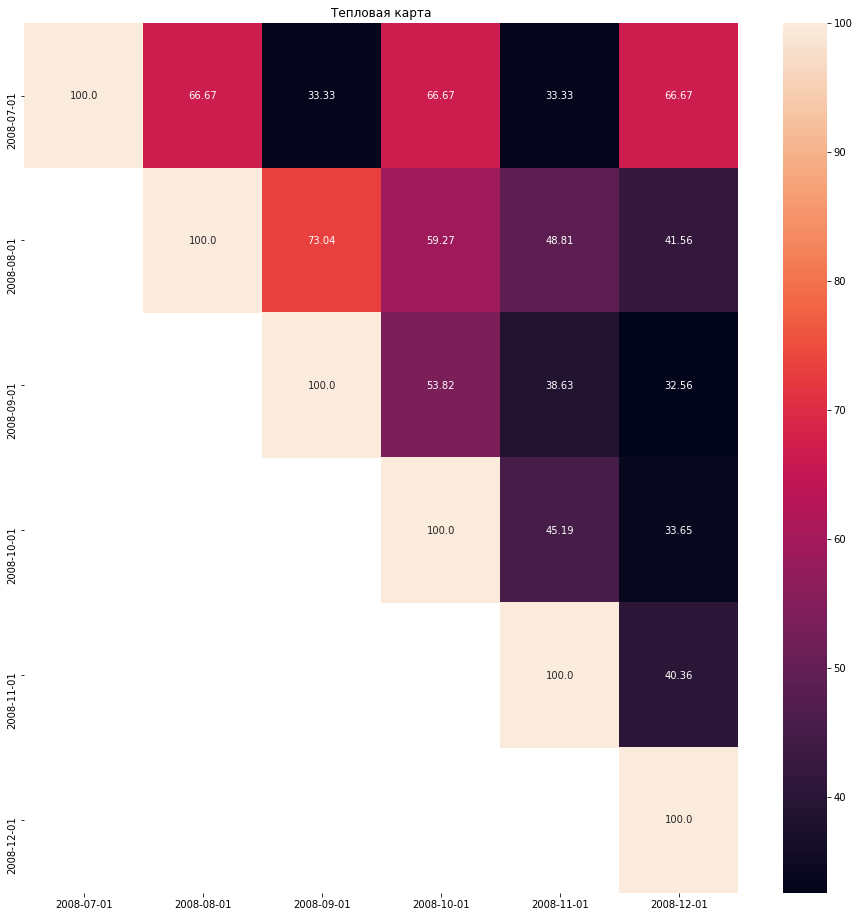

In [21]:
# постройте тепловую карту Retention Rate
retention = df.pivot('cohort_date', 'session_date', 'retention_rate')
retention.index = [str(x) for x in retention.index]
retention.columns = [str(x) for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16))
sns.heatmap(retention,
            annot=True,
            fmt='')
plt.title('Тепловая карта') 
plt.show()

### Ответ:
Для тепловой карты когорт характерен постепенный отвал пользователей когорты: от 100% в первый месяц до более низких в последующие, обычно каждый следующий месяц остается все меньше пользователей.

На данной карте мы видим аномальную первую когорту пользователей: значения активных пользователей "мигают": 66%, 33%, 66%, 33%. Кроме того, в этой корогте всего три пользователя. Можно предположить, что это аккаунты основателей проекта, которые вели себя иначе, чем большинство "нормальных" пользователей. Например, среди основателей проекта более высокая активность и более низкий отсев. 

Возможно, что во вторую когорту (август 2008) также вошло некоторое количество аккаунтов членов команды: эта когорта также показывает более высокое удержание по сравнению с последующими.

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [23]:
# напишите запрос
query = '''
WITH months_posts AS
(SELECT CAST(EXTRACT(month FROM posts.creation_date) AS INT) AS creation_month,
    COUNT(posts.id) AS posts_count
FROM stackoverflow.posts
WHERE posts.creation_date >= '2008-09-01'
GROUP BY EXTRACT(month FROM creation_date)
)

SELECT creation_month,
    posts_count,
    ROUND((
        (posts_count - (LAG(posts_count, 1, NULL) OVER(ORDER BY creation_month))) * 100.00 / 
        (LAG(posts_count, 1, NULL) OVER(ORDER BY creation_month))), 2) AS growth_percents
FROM months_posts
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,creation_month,posts_count,growth_percents
0,9,70371,NaN
1,10,63102,-10.33
2,11,46975,-25.56
3,12,44592,-5.07


In [24]:
months = {9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month'] = df['creation_month'].map(months)
df = df.drop('creation_month', axis=1)

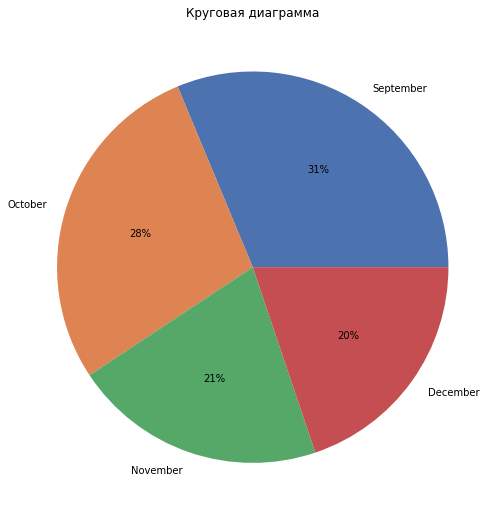

In [25]:
# постройте круговую диаграмму с количеством постов по месяцам
#define data
data = df['posts_count']
labels = df['month']

#define Seaborn color palette to use
colors = sns.color_palette('deep')

#create pie chart
plt.figure(figsize=(9, 9))
plt.title('Круговая диаграмма')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [26]:
# напишите запрос
query = '''
WITH this_user AS
(SELECT posts.user_id
FROM stackoverflow.posts
GROUP BY posts.user_id
ORDER BY COUNT(posts.id) DESC
LIMIT 1),

his_posts AS
(SELECT posts.creation_date AS creation_date,
    EXTRACT(week from posts.creation_date) AS creation_week
FROM stackoverflow.posts
WHERE user_id = (SELECT * FROM this_user)
AND creation_date >= '2008-10-01'
AND creation_date <= '2008-11-01'
)

SELECT creation_week,
    MAX(creation_date) AS max_creation_date
FROM his_posts
GROUP BY creation_week
ORDER BY creation_week
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,creation_week,max_creation_date
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01


In [27]:
# напишите запрос
# если обязательно нужно через оконную функцию, то можно как-то так:
query = '''
WITH this_user AS
(SELECT posts.user_id
FROM stackoverflow.posts
GROUP BY posts.user_id
ORDER BY COUNT(posts.id) DESC
LIMIT 1),

his_posts AS
(SELECT EXTRACT(week from posts.creation_date) AS creation_week,
    MAX(creation_date) OVER (PARTITION BY EXTRACT(week from posts.creation_date)) AS max_creation_date
FROM stackoverflow.posts
WHERE user_id = (SELECT * FROM this_user)
AND creation_date >= '2008-10-01'
AND creation_date < '2008-11-01'
)

SELECT DISTINCT *
FROM his_posts
ORDER BY creation_week
'''

# выполните запрос
df = pd.read_sql_query(query, con=engine)
df

,creation_week,max_creation_date
0,40.0,2008-10-05 09:00:58
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 21:44:36
4,44.0,2008-10-31 22:16:01
